In [1]:
from pylab import *
from numpy import exp
import numpy as np
import pandas as pd
import bottleneck as bn
import warnings
warnings.filterwarnings("ignore", message="divide by zero encountered") 
warnings.filterwarnings("ignore", message="invalid value encountered")
warnings.filterwarnings("ignore", category=DeprecationWarning)

Text(0.5, 1.0, 'Bose-Einstein Distribution')

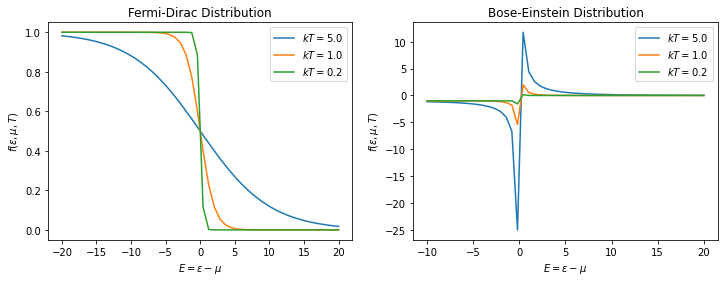

In [2]:
%matplotlib inline

ktvalues = [5.0, 1.0, 0.2];
legarray = [];


fig, ax = plt.subplots(1,2,figsize=(12,4))

for i in range(0,len(ktvalues)):
    kt = ktvalues[i];
    x =linspace(-20,20);
    f = 1.0/(exp(x/kt)+1);
    ax[0].plot(x,f);
    legarray.append("$kT=$"+str(kt));
ax[0].set_xlabel('$E=\epsilon-\mu$');
ax[0].set_ylabel('$f(\epsilon, \mu,T)$')
ax[0].legend(legarray);
ax[0].set_title('Fermi-Dirac Distribution')


for i in range(0,len(ktvalues)):
    kt = ktvalues[i];
    x =linspace(-10,20);
    f = 1.0/(exp(x/kt)-1);
    ax[1].plot(x,f);
    legarray.append("$kT=$"+str(kt));
ax[1].set_xlabel('$E=\epsilon-\mu$');
ax[1].set_ylabel('$f(\epsilon, \mu,T)$')
ax[1].legend(legarray);
ax[1].set_title('Bose-Einstein Distribution')

kT = 1.0


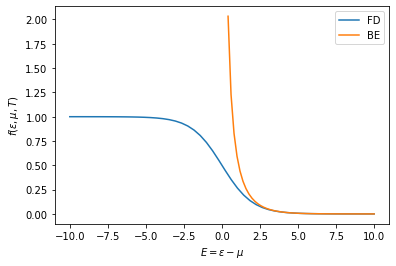

In [3]:
kt = 1.0;
legarray = [];
x =linspace(-10,10);
f = 1.0/(exp(x/kt)+1);
plot(x,f)
legarray.append('FD');
x =linspace(0.4,10);
f = 1.0/(exp(x/kt)-1);
plot(x,f)
legarray.append('BE');
xlabel('$E=\epsilon-\mu$');
ylabel('$f(\epsilon, \mu,T)$')
print('kT = 1.0')
legend(legarray);

$$ n_b=1/(\exp(E/kT)-1) $$
$$ n_a(t)=n_a*\exp((-2L^2t\pi)/O_b)+n_b*(1-\exp((2L^2t\pi)/O_b)) $$

In [4]:
# import tkinter
# matplotlib.use('TkAgg')
    
def plot_n_a(final):
    plt.rcParams['figure.figsize'] = (8, 8)
    ax = axes(projection='3d')
    ax.plot_trisurf(final.t, final.kT, final.n_a, cmap=cm.jet, linewidth=0.2)
    ax.set_xlabel('time t')
    ax.set_ylabel('temp kT')
    ax.set_zlabel('$n_a$')
    plt.show()
    
def plot_n_b(final):
    plt.rcParams['figure.figsize'] = (8, 8)
    ax = axes(projection='3d')
    ax.set_xlabel('Energy E')
    ax.set_ylabel('temp kT')
    ax.set_zlabel('$n_b$')
    ax.plot_trisurf(final.t, final.kT, final.n_b, cmap=cm.jet, linewidth=0.2)
    plt.show()
    

In [5]:
L = float(input("Constant of Interaction between Alice and the Reservoir R = "))

Constant of Interaction between Alice and the Reservoir R = 0.7


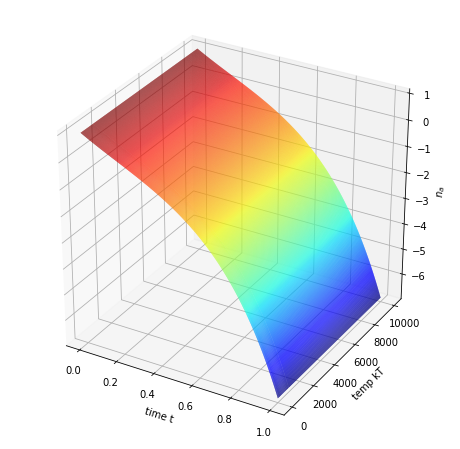

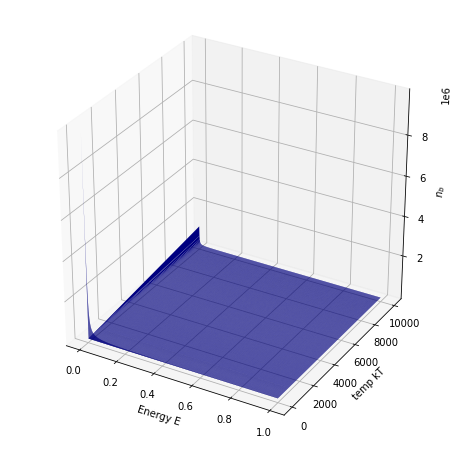

In [6]:
# initial parameters

O_b = 1.0                    # Omega(k) function dependent on particles/degrees of freedom (k) in the reservoir
E = 1.0                      # Total energy of the system
kT = 1.0                     # Reservoir environment 'temperature'
n_a = 1.0                    # Initial P(A=1), Alice for Brexit
n_b = 1./3                   # Initial homogenous environment for anti-Brexit

n_a_total = []
n_b_total = []

# at time t=0,
n_bt = n_b
n_at = n_a

final = pd.DataFrame(columns=['n_a', 'n_b', 't', 'kT'])

# Evolution over time t
for t in np.arange(0, 1, 0.001):
    
    for kT in [1, 10, 100, 1000, 10000]:
        
        # Record the change
        dat = {'n_a':n_at, 'n_b':n_bt, 't':t, 'kT':kT}
        final = final.append(dat, ignore_index=True)

        # update n_at based on bagarello 2018
        n_at = (n_a * np.exp(((-2*(L**2)*np.pi*t)/O_b)) + n_b * (1-np.exp(-((-2*(L**2)*np.pi*t)/O_b))))
        
        # update n_bt based on BE distribution
        n_bt = (1/(np.exp(t/kT)-1))
        #O_b = np.sqrt(1/n_bt)
        
        
plot_n_a(final)
plot_n_b(final)